In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import neural_network_dynamics.main as ntwk
import analytics.functions as theory
from analytics.mean_field import find_fp, plot_analytics
from data_analysis.IO.hdf5 import load_dict_from_hdf5

In [2]:
dt, tstop = 0.1, 2000.
t_array = np.arange(int(tstop/dt))*dt

NEURONS = [{'name':'Exc', 'N':4000, 'type':'LIF2'},
           {'name':'Inh', 'N':1000, 'type':'LIF2'}]

M = ntwk.init_syn_and_conn_matrix(NEURONS, pconn=0.02)
M[0,0]['Q'], M[0,1]['Q'] = 2., 5.
M[1,0]['Q'], M[1,1]['Q'] = 10, 10

NTWK = ntwk.build_populations(NEURONS, M,
                              with_raster=True, with_pop_act=True,
                              with_Vm=4, with_synaptic_currents=True)

t = np.arange(int(tstop/dt))*dt
# # afferent excitation
RATE_EAff = 1.
EAff = {'Q':5., 'N':400, 'pconn':0.1}
for i, cond in zip(range(2), ['ExcExc', 'ExcInh']): # both on excitation and inhibition
    ntwk.construct_feedforward_input(NTWK, NTWK['POPS'][i], EAff,
                                     t, RATE_EAff+0.*t,
                                     conductanceID=cond,
                                     SEED=3*i+i)

ntwk.initialize_to_rest(NTWK)
ntwk.build_up_recurrent_connections(NTWK)
network_sim = ntwk.collect_and_run(NTWK, tstop=tstop, dt=dt)
ntwk.write_as_hdf5(NTWK, filename='data/sas.h5')
sas_data = load_dict_from_hdf5('data/sas.h5')

synaptic network parameters --NOT-- in SI units


In [2]:
sas_data = load_dict_from_hdf5('data/sas.h5')

In [46]:
sas_data.keys()

dict_keys(['POP_ACT_Inh', '1_params', 'ISYNe_Inh', 'iRASTER_Inh', 'tRASTER_Exc', '0', 'ISYNi_Inh', '1', 'dt', 'tRASTER_Inh', 'POP_ACT_Exc', 'VMS_Inh', 'ISYNe_Exc', 'tstop', 'ISYNi_Exc', 'iRASTER_Exc', 'VMS_Exc', '0_params'])

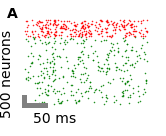

In [55]:
fig = ntwk.raster_fig(sas_data, tzoom=[500,800]);
fig.text(0, .85, 'A', fontsize=14, weight='bold')

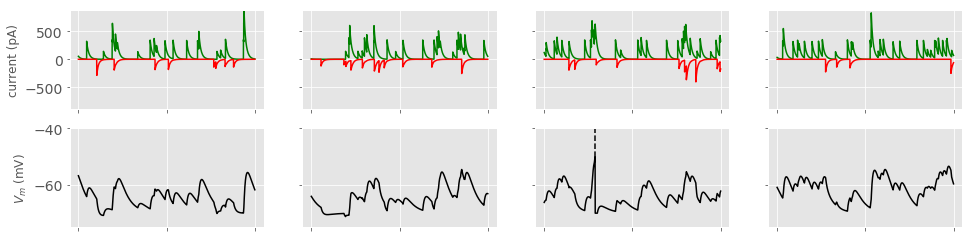

In [55]:
ntwk.Vm_Isyn_fig(sas_data, pop_key='Exc',tzoom=[1600,2000]);

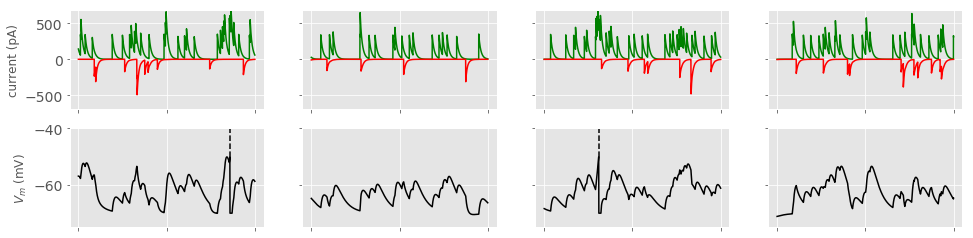

In [56]:
ntwk.Vm_Isyn_fig(sas_data, pop_key='Inh',tzoom=[800,1200]);

In [3]:
dt, tstop = 0.1, 2000.

NEURONS = [{'name':'Exc', 'N':4000, 'type':'LIF2'},
           {'name':'Inh', 'N':1000, 'type':'LIF2'}]

M = ntwk.init_syn_and_conn_matrix(NEURONS, pconn=0.02)
M[0,0]['Q'], M[0,1]['Q'] = 2., 5.
M[1,0]['Q'], M[1,1]['Q'] = 10, 10

NTWK = ntwk.build_populations(NEURONS, M,
                              with_raster=True, with_pop_act=True,
                              with_Vm=4, with_synaptic_currents=True)

t = np.arange(int(tstop/dt))*dt
# # afferent excitation
RATE_EAff = 10.
EAff = {'Q':5., 'N':400, 'pconn':0.1}
for i, cond in zip(range(2), ['ExcExc', 'ExcInh']): # both on excitation and inhibition
    ntwk.construct_feedforward_input(NTWK, NTWK['POPS'][i], EAff, t, RATE_EAff+0.*t,
                                     conductanceID=cond, with_presynaptic_spikes=True, SEED=3*i+i)

RATE_Idsinh = 10.
Idsinh = {'Q':10., 'N':400, 'pconn':0.1}
ntwk.construct_feedforward_input(NTWK, NTWK['POPS'][1], Idsinh, t, RATE_Idsinh+0.*t,
                                     conductanceID='InhInh', with_presynaptic_spikes=True, SEED=5+i**2)
ntwk.initialize_to_rest(NTWK)
ntwk.build_up_recurrent_connections(NTWK)
network_sim = ntwk.collect_and_run(NTWK, tstop=tstop, dt=dt)
ntwk.write_as_hdf5(NTWK, filename='data/bs.h5')
bs_data = load_dict_from_hdf5('data/bs.h5')

synaptic network parameters --NOT-- in SI units


In [12]:
zf = zipfile.ZipFile('aff_exc_aff_dsnh_params_space.zip')
data = zf.read('data/bs.h5')

with open('data/bs1.h5', 'wb') as f:
    f.write(data)
    

In [28]:
data = load_dict_from_hdf5('data/bs1.h5')

In [2]:
from params_scan.aff_exc_aff_dsnh_params_space import get_scan
F_aff, F_dsnh, DATA = get_scan('params_scan/aff_exc_aff_dsnh_params_space.zip')

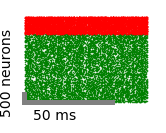

In [43]:
ntwk.raster_fig(DATA[3], tzoom=[800,870]);

In [51]:
DATA[0]['faff']

0.01

In [179]:
ntwk.assemble_quantities(DATA[1], 'img.png', tzoom=[800,1200]);
import IPython
IPython.display.Image('img.png')

<IPython.core.display.Image object>

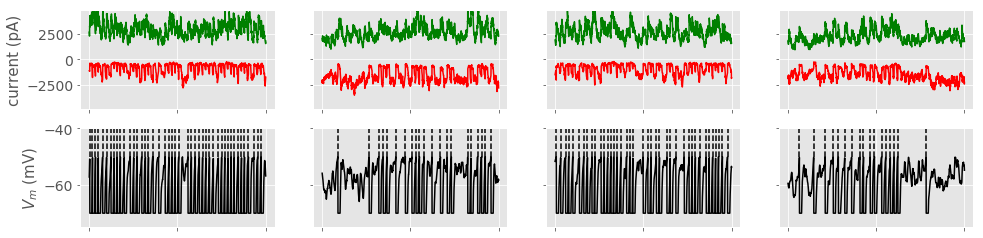

In [9]:
ntwk.Vm_Isyn_fig(bs_data, pop_key='Inh', tzoom=[800,1200]);

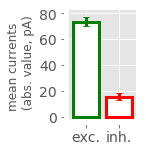

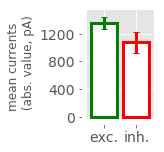

In [57]:
#from neural_network_dynamics.analysis.plot_sim import exc_inh_balance
ntwk.exc_inh_balance(bs_data)
ntwk.exc_inh_balance(sas_data)

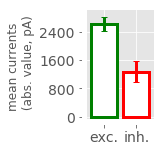

In [40]:
ntwk.exc_inh_balance(bs_data, pop_key='Inh')

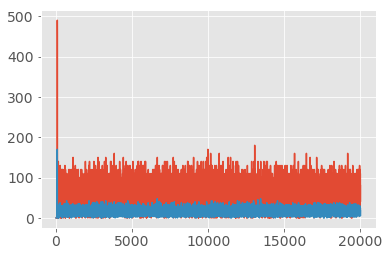

In [28]:
plt.plot(NTWK['POP_ACT'][1].rate)
plt.plot(NTWK['POP_ACT'][0].rate)

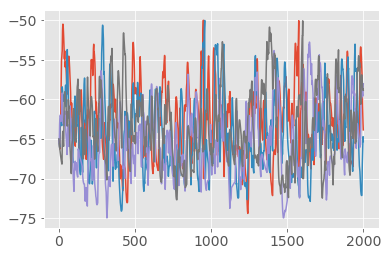

In [148]:
for i in range(4): plt.plot(VMS[0][i].t/ntwk.ms, VMS[0][i].V/ntwk.mV)

([<matplotlib.axis.XTick at 0x11c6a2c18>,
 <a list of 2 Text xticklabel objects>)

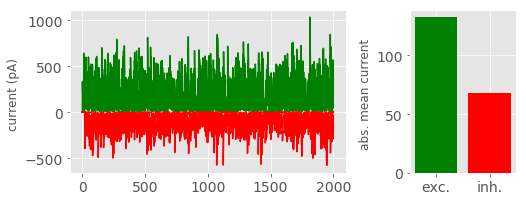

In [149]:
plt.figure(figsize=(8,3))
plt.subplots_adjust(wspace=.6)
plt.subplot2grid((1, 3), (0, 0), colspan=2)
for i in range(4): plt.plot(ISYNe[0][i].t/ntwk.ms, ISYNe[0][i].Ie/ntwk.pA, 'g')
for i in range(4): plt.plot(ISYNi[0][i].t/ntwk.ms, ISYNi[0][i].Ii/ntwk.pA, 'r')
plt.ylabel('current (pA) ')
plt.subplot2grid((1, 3), (0, 2))
plt.bar([0], np.mean([np.mean(ISYNe[0][i].Ie/ntwk.pA) for i in range(4)]), color='g')
plt.bar([1], -np.mean([np.mean(ISYNi[0][i].Ii/ntwk.pA) for i in range(4)]), color='r')
plt.ylabel('abs. mean current ')
plt.xticks([0,1], ['exc.', 'inh.'])

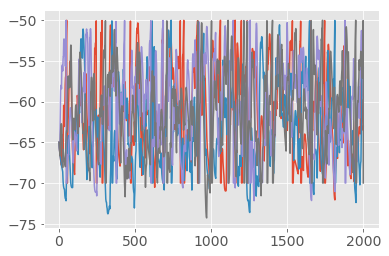

In [150]:
for i in range(4): plt.plot(VMS[0][i].t/ntwk.ms, VMS[1][i].V/ntwk.mV)

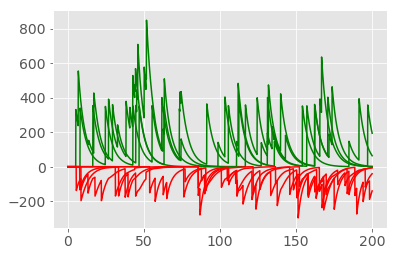

In [107]:
for i in range(4): plt.plot(ISYNe[0][i].t/ntwk.ms, ISYNe[1][i].Ie/ntwk.pA, 'g')
for i in range(4): plt.plot(ISYNi[0][i].t/ntwk.ms, ISYNi[1][i].Ii/ntwk.pA, 'r')

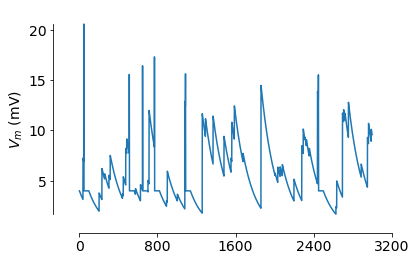

In [4]:
# ==========================================
#       A single trial example 
# ==========================================

vv, fout = sim.run_sim(Ecell_params, Icell_params, ntwk_params,\
                       syn_params, drive_params,
                       experiment={'type':'single-cell-exc', 'fe':0., 'fi':0.},

                       tstop=.3)
plt.plot(1e3*vv[0])
set_plot(plt.gca(), ylabel=r'$V_m$ (mV)')

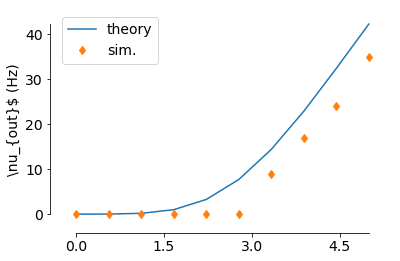

In [5]:
# ==========================================
#       A single trial example 
# ==========================================

fe = np.linspace(0., 5., 10)
Fout_sim = [sim.run_sim(Ecell_params, Icell_params, ntwk_params, syn_params,\
            {'F_Eaff':0., 'F_Idsinh':3.}, dt=1e-5, tstop=1.,
            experiment={'type':'single-cell-exc', 'fe':ff, 'fi':10.})[1] for ff in fe]
plt.plot(fe, Fout_sim, 'd', label='sim.')
set_plot(plt.gca(), ylabel=r'\nu_{out}$ (Hz)', xlabel=r'\nu_e^{cort}$ (Hz)')
plt.legend();

In [0]:
# ==========================================
#       A single trial example 
# ==========================================

Fout_th = [theory.FPT_shotnoise(ff, 10., Ecell_params, ntwk_params, syn_params,
          {'F_Eaff':0., 'F_Idsinh':3.}) for ff in fe]


In [50]:
##############################################################################
#### The Balanced State
##############################################################################

# excitatory cell 
Ecell_params = {'Tm':15e-3, 'Vthre':20e-3, 'Vreset':4e-3, 'Trefrac': 5e-3}
# inhibitory cell 
Icell_params = {'Tm':15e-3, 'Vthre':19e-3, 'Vreset':4e-3, 'Trefrac': 5e-3}
# synaptic weights
Qe, Qi = .6e-3, -1e-3
syn_params = {
             'J_Eaff_Ecort':Qe, 'J_Eaff_Icort':Qe,
             'J_Idsinh_Icort':Qi,
             'J_Ecort_Ecort':Qe,'J_Ecort_Icort':Qe,
             'J_Icort_Ecort':Qi,'J_Icort_Icort':Qi,
              }
# network and connectivity parameters
ntwk_params = {
              'N_Ecort':4000, 'N_Icort':1000,
              'N_Eaff':400, 'N_Idsinh':100,
              'p_Eaff_Ecort':0.5, 'p_Eaff_Icort':0.5,
              'p_Idsinh_Icort':0.5,
              'p_Ecort_Ecort':0.05,'p_Ecort_Icort':0.05,
              'p_Icort_Ecort':0.05,'p_Icort_Icort':0.05
              }
# afferent activity parameters
drive_params = {'F_Eaff':7.6, 'F_Idsinh':0.}

## analytics

# plot_analytics(**find_fp(Ecell_params, Icell_params,
#                                        ntwk_params, syn_params, drive_params,
#                                        nb_points=20));                                       

In [39]:
## ===>. Running Network Simulation

bs_data = sim.run_sim(Ecell_params, Icell_params, ntwk_params,\
                       syn_params, drive_params,
                       synaptic_distrib='',
                       experiment={'type':'recurrent-network'}, tstop=.3, nrec=3)


0.71 1.78


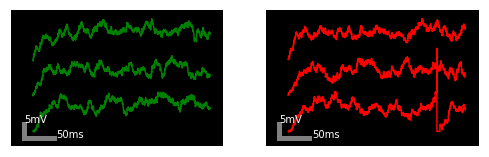

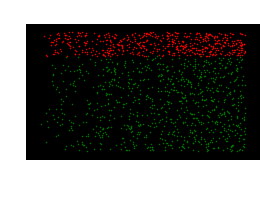

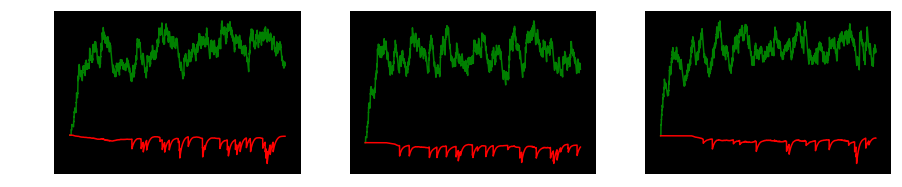

In [122]:
## ===>. Analyzing Simulation

sim.analyze_ntwk_sim(bs_data)
print(bs_data['mean_exc_rate'], bs_data['mean_inh_rate'])
FIGS = sim.plot_ntwk_sim(bs_data)
put_list_of_figs_to_svg_fig(FIGS, fig_name='fig_bs.svg')

In [43]:
##############################################################################
#### The Sparse Activity State
##############################################################################

# excitatory cell 
Ecell_params = {'Tm':15e-3, 'Vthre':15e-3, 'Vreset':4e-3, 'Trefrac': 5e-3}
# inhibitory cell 
Icell_params = {'Tm':15e-3, 'Vthre':13e-3, 'Vreset':4e-3, 'Trefrac': 5e-3}
# synaptic weights
Qe, Qi = 2e-3, -2e-3/5.
syn_params = {
             'J_Eaff_Ecort':Qe, 'J_Eaff_Icort':Qe,
             'J_Idsinh_Icort':Qi,
             'J_Ecort_Ecort':Qe/10.,'J_Ecort_Icort':Qe/10.,
             'J_Icort_Ecort':Qi,'J_Icort_Icort':Qi,
              }
# network and connectivity parameters
ntwk_params = {
              'N_Ecort':4000, 'N_Icort':1000,
              'N_Eaff':400, 'N_Idsinh':100,
              'p_Eaff_Ecort':0.5, 'p_Eaff_Icort':0.5,
              'p_Idsinh_Icort':0.5,
              'p_Ecort_Ecort':0.05,'p_Ecort_Icort':0.05,
              'p_Icort_Ecort':0.05,'p_Icort_Icort':0.05
              }
# afferent activity parameters
drive_params = {'F_Eaff':0.55, 'F_Idsinh':0.}

sas_data = sim.run_sim(Ecell_params, Icell_params, ntwk_params,\
                       syn_params, drive_params,
                       experiment={'type':'recurrent-network'}, tstop=.3, nrec=3)

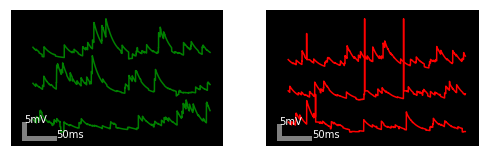

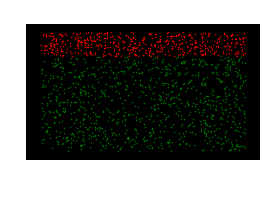

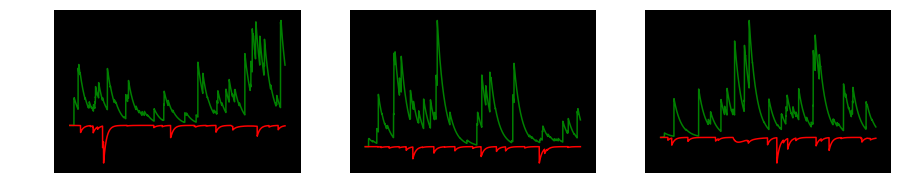

In [121]:
sim.analyze_ntwk_sim(sas_data)
FIGS = sim.plot_ntwk_sim(sas_data)
put_list_of_figs_to_svg_fig(FIGS, fig_name='fig_sas.svg')

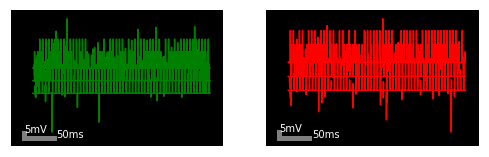

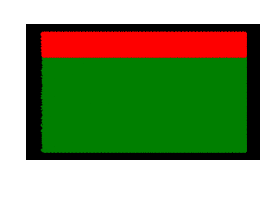

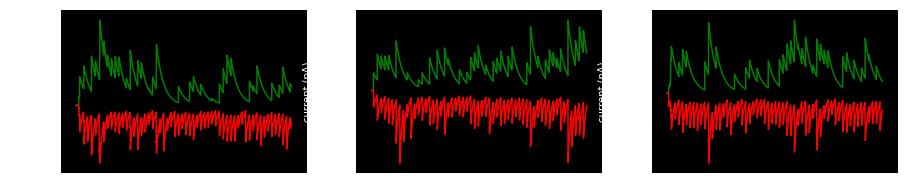

In [120]:
sas2_data = sim.run_sim(Ecell_params, Icell_params, ntwk_params,\
                       syn_params, {'F_Eaff':0.8, 'F_Idsinh':0.},
                       experiment={'type':'recurrent-network'}, tstop=.3, nrec=3)
sim.analyze_ntwk_sim(sas2_data)
FIGS = sim.plot_ntwk_sim(sas2_data)
put_list_of_figs_to_svg_fig(FIGS, fig_name='fig_sas2.svg')

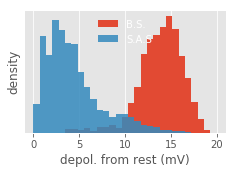

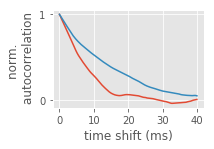

In [119]:
"""
We compare two regimes
"""
from analysis.compare_two_regimes import Vm_hist, Vm_Tv
import brian2

fig1 = Vm_hist(bs_data, sas_data, LABELS=['B.S.', 'S.A.S'])
fig2 = Vm_Tv(bs_data, sas_data, LABELS=['B.S.', 'S.A.S'], tstop=40)
fig1.savefig('vm_hist_comp.svg')    
fig2.savefig('vm_TV_comp.svg')    

In [0]:
# then fake data at the moment for illustration purpose
with plt.style.context(('ggplot')):
     fig, ax = plt.subplots(figsize=(3,2.))
     plt.subplots_adjust(bottom=.2, left=.2)
     ax.set_ylabel('firing rate (Hz)')
     ax.bar([1, 2.5], [1, 1.8], width=.5)
     ax.bar([0.5, 2], [.5, .9], width=.5)
     # ax.set_yticks([0,75,150])
     ax.set_xticks([0.75,2.25])
     ax.set_xticklabels(['exc.', 'inh.'])
     ax.set_yticks([0,1,2])
     ax.set_yticklabels(['0.1', '1', '10'])
fig.savefig('balance.svg')
     


NameError: name 'data' is not defined

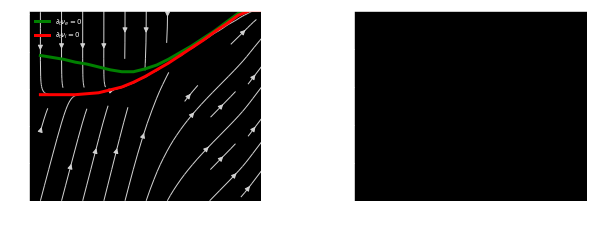

NameError: name 'data' is not defined

In [89]:
##############################################################################
#### Something Else ?
##############################################################################

# excitatory cell 
Ecell_params = {'Tm':15e-3, 'Vthre':15e-3, 'Vreset':4e-3, 'Trefrac': 5e-3}
# inhibitory cell 
Icell_params = {'Tm':15e-3, 'Vthre':10e-3, 'Vreset':4e-3, 'Trefrac': 5e-3}
# synaptic weights
Qe, Qi = 3e-3, -5e-3
syn_params = {
             'J_Eaff_Ecort':Qe, 'J_Eaff_Icort':Qe,
             'J_Idsinh_Icort':Qi,
             'J_Ecort_Ecort':Qe,'J_Ecort_Icort':Qe,
             'J_Icort_Ecort':Qi,'J_Icort_Icort':Qi,
              }
# network and connectivity parameters
ntwk_params = {
              'N_Ecort':4000, 'N_Icort':1000,
              'N_Eaff':400, 'N_Idsinh':100,
              'p_Eaff_Ecort':0.5, 'p_Eaff_Icort':0.5,
              'p_Idsinh_Icort':0.5,
              'p_Ecort_Ecort':0.05,'p_Ecort_Icort':0.05,
              'p_Icort_Ecort':0.05,'p_Icort_Icort':0.05
              }
# afferent activity parameters
drive_params = {'F_Eaff':0.1, 'F_Idsinh':0.}

plot_analytics(**find_fp(Ecell_params, Icell_params, ntwk_params, syn_params, drive_params, nb_points=20));

sim.plot_ntwk_sim(data)                       

{'fe0': 1.0639758458609181, 'fi0': 1.1129886936423121}


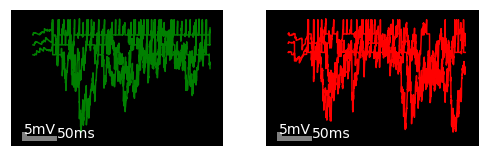

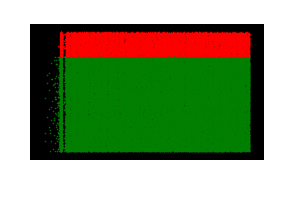

In [98]:
balanced_data = sim.run_sim(Ecell_params, Icell_params, ntwk_params,\
                       syn_params, drive_params,
                       experiment={'type':'recurrent-network'}, tstop=.3, nrec=3)
sim.plot_ntwk_sim(balanced_data)



In [104]:
print(sim.analyze_ntwk_sim(balanced_data))

{'fe0': 61.173116931695972, 'fi0': 48.683614997930803}


In [12]:
## ==========================================
## Compare numerical simulations and analytics
## ==========================================

def compare_analytics_and_sim(analytics_data, sim_data):
    AD, SD = analytics_data, sim_data
    fig, AX = plt.subplots(1, 6, figsize=(6.*3.5,2.5));plt.subplots_adjust(wspace=.4)
    for ax, key, label, scale in zip(AX, ['fe0', 'fi0', 'muV', 'sV', 'DIe', 'DIi'],
                                      ['$\\nu_e$ (Hz)', '$\\nu_i$ (Hz)', '$\mu_V$ (mV)', '$\sigma_V$ (mV)',\
                                          '$I_e$ (pA/ms)', '$I_i$ (pA/ms)'],
                                      [1.,1.,1e3,1e3,1e9,1e9]):
        ax.bar([0], [scale*AD[key]], facecolor='w', edgecolor='k', lw=4, label='analytics') # 1e9 A/s -> pA/ms
        ax.bar([1], [scale*SD[key]], facecolor='lightgray', edgecolor='gray', lw=2, label='simulation')
        set_plot(ax, ylabel=label, xticks=[])
    ax.legend(loc='best', frameon=False, prop={'size':'small'})
    return fig


In [13]:

from graphs.ntwk_dyn_plot import RASTER_PLOT, POP_ACT_PLOT

def plot_ntwk_sim(data):
    
    fig, AX = plt.subplots(1, 2, figsize=(10,3))
    plt.subplots_adjust(left=.25, bottom=.25)
    for i in data['VMS'][0].record:
        AX[0].plot(1e3*data['POP_ACTS'][0].t, 1e3*data['VMS'][0][i].v/brian2.volt+10.*i, 'g-')
        AX[1].plot(1e3*data['POP_ACTS'][0].t, 1e3*data['VMS'][1][i].v/brian2.volt+10.*i, 'r-')
    #plt.plot([50,50], [-30,-10], 'k-', lw=4)
    #plt.annotate('20mV', (60,-7))
    for ax in AX:
        set_plot(ax, ylabel='$V_m$ (mV)', xlabel='time (ms)')

    fig2, ax = RASTER_PLOT([data['RASTERS'][0].t/brian2.second, data['RASTERS'][1].t/brian2.second], [data['RASTERS'][0].i, data['RASTERS'][1].i])
    
# plot_ntwk_sim(data)

In [16]:
A = {'x':np.arange(100), 'y':np.sin(np.arange(100))}
np.savez('temp.npz', **A)

In [19]:
A = np.load('temp.npz')
A['y']

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721,
        0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836,
       -0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388,
       -0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269,
       -0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539,
        0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193,
        0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265,
       -0.26237485,  0.67022918,  0.98662759,  0.39592515, -0.55878905,
       -0.99975517, -0.521551  ,  0.43616476,  0.99287265,  0.63673801,
       -0.30481062, -0.96611777, -0.7391807 ,  0.1673557 ,  0.92002604,
        0.82682868, -0.02655115, -0.85551998, -0.89792768, -0.11